In [1]:
import numpy as np
import pandas as pd

from pandas import Series,DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {'grid.linestyle': '--'})
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
from sklearn import metrics
# 予測の精度を検証するメソッドが集まっている

In [4]:
import statsmodels.api as sm

In [5]:
def logistic(t):
    return 1.0/(1+math.exp(-1.0*t))

In [9]:
t = np.linspace(-6,6,500)

In [13]:
y = np.array([logistic(ele) for ele in t])

Text(0.5, 1.0, 'Logistic Function')

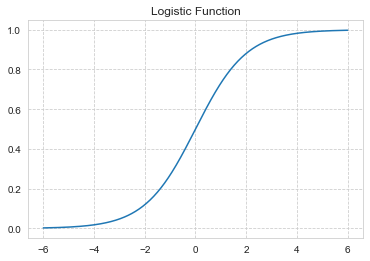

In [14]:
plt.plot(t,y)
plt.title('Logistic Function')

In [15]:
df = sm.datasets.fair.load_pandas().data

In [16]:
df.head()
# affairs 不倫している時間

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [17]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [18]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [19]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [20]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


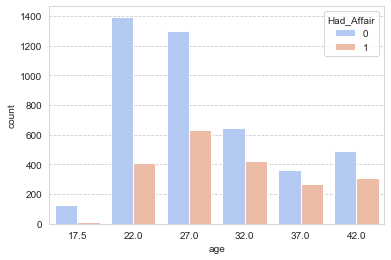

In [28]:
sns.countplot('age', data= df.sort_values('age'), hue= 'Had_Affair',palette='coolwarm')

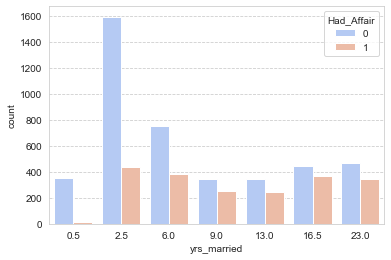

In [29]:
sns.countplot('yrs_married', data= df.sort_values('yrs_married'), hue= 'Had_Affair',palette='coolwarm')

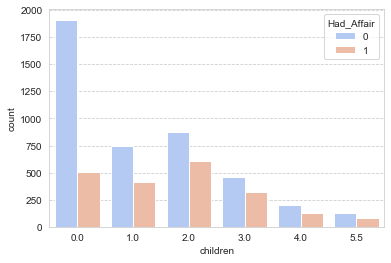

In [30]:
sns.countplot('children', data= df.sort_values('children'), hue= 'Had_Affair',palette='coolwarm')

# 結婚してから年が浅いため、子供がいないと不倫していいない率が高く見えている

In [32]:
occ_dummies = pd.get_dummies(df['occupation'])

# 仕事データが数値になっている。数字の値の大きさに意味がないため、ダミー変数に展開する.
# ダミー変数とはカラムにもとの値として、0,1で表現をする

In [33]:
hus_occ_dummies = pd.get_dummies(df.occupation_husb)

In [34]:

occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [35]:
X = df.drop(['occupation', 'occupation_husb', 'Had_Affair'], axis = 1)

In [36]:
dummies = pd.concat([occ_dummies, hus_occ_dummies], axis =1)

In [37]:
X = pd.concat([X,dummies],axis=1)

In [38]:
X.head()
# 職業の列が展開された

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [39]:
Y = df.Had_Affair

In [40]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [41]:
# 多重共線性 お互いに相関が高い値を入れるのはナンセンス
# 多重共線性　を回避するための処理をする

In [42]:
X = X.drop('occ1',axis =1)

In [43]:
X = X.drop('hocc1',axis =1)

In [44]:
X = X.drop('affairs',axis =1)

In [45]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [46]:
Y.values

array([1, 1, 1, ..., 0, 0, 0])

In [47]:
np.ravel(Y)

array([1, 1, 1, ..., 0, 0, 0])

In [48]:
log_model = LogisticRegression()

In [49]:
log_model.fit(X,Y)

/Users/fujiiryou/.pyenv/versions/3.7.4/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
log_model.score(X,Y)

0.7258875274897895

In [51]:
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T

In [52]:
coeff_df

,0,1
0,rate_marriage,-0.697676
1,age,-0.0562709
2,yrs_married,0.10384
3,children,0.0182525
4,religious,-0.36842
5,educ,0.00873955
6,occ2,0.29679
7,occ3,0.606997
8,occ4,0.344973
9,occ5,0.941219


In [53]:
X_train , X_test, Y_train,Y_test = train_test_split(X,Y)

In [54]:
log_model2 = LogisticRegression()

In [55]:
log_model2.fit (X_train, Y_train)

/Users/fujiiryou/.pyenv/versions/3.7.4/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
class_predict = log_model2.predict(X_test)

In [57]:
class_predict

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
metrics.accuracy_score(Y_test , class_predict)

0.7217336683417085